In [108]:
#imports
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

#Read in full dataset
data = pd.read_csv('C:/Users/mayro/OneDrive/Desktop/Classification/Classification-Hackathon-Exam/train_set/train_set.csv')
test_df = pd.read_csv('C:/Users/mayro/OneDrive/Desktop/Classification/Classification-Hackathon-Exam/test_set.csv')


In [109]:
data.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [110]:
#Filter by text language
lang_id = ['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl','zul', 'ssw', 'tso', 'sot', 'afr']
#data = data[data['lang_id'].isin(lang_id)]

#Select 2000 rows for each language
data_trim = pd.DataFrame(columns=['lang_id','text'])

for l in lang_id:
    lang_trim = data[data['lang_id'] ==l].sample(2000,random_state = 100)
    data_trim = data_trim.append(lang_trim)

#Create a random train, valid, test split
data_shuffle = data_trim.sample(frac=1)

train = data_shuffle[0:15400]
valid = data_shuffle[15400:19800]
test = data_shuffle[19800:22000]

C:\Users\mayro\AppData\Local\Temp/ipykernel_60004/3808170316.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_trim = data_trim.append(lang_trim)
C:\Users\mayro\AppData\Local\Temp/ipykernel_60004/3808170316.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_trim = data_trim.append(lang_trim)
C:\Users\mayro\AppData\Local\Temp/ipykernel_60004/3808170316.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_trim = data_trim.append(lang_trim)
C:\Users\mayro\AppData\Local\Temp/ipykernel_60004/3808170316.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_trim = data_trim.append(lang_trim)
C:\Users\mayro\AppData\Local

In [111]:
from sklearn.feature_extraction.text import CountVectorizer

def get_trigrams(corpus,n_feat=200):
    """
    Returns a list of the N most common character trigrams from a list of sentences
    params
    ------------
        corpus: list of strings
        n_feat: integer
    """
    
    #fit the n-gram model
    vectorizer = CountVectorizer(analyzer='char',
                            ngram_range=(3, 3)
                            ,max_features=n_feat)
    
    X = vectorizer.fit_transform(corpus)
    
    #Get model feature names
    feature_names = vectorizer.get_feature_names()
    
    return feature_names

In [112]:
#obtain trigrams from each language
features = {}
features_set = set()

for l in lang_id:
    
    #get corpus filtered by language
    corpus = train[train.lang_id==l]['text']
    
    
    #get 200 most frequent trigrams
    trigrams = get_trigrams(corpus)
    
    #add to dict and set
    features[l] = trigrams 
    features_set.update(trigrams)

    
#create vocabulary list using feature set
vocab = dict()
for i,f in enumerate(features_set):
    vocab[f]=i

C:\Users\mayro\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [113]:
len(features['eng'])

200

In [123]:
#train count vectoriser using vocabulary
vectorizer = CountVectorizer(analyzer='char',
                             ngram_range=(3, 3),
                            vocabulary=vocab)

#create feature matrix for training set
corpus = train['text']   
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()

train_feat = pd.DataFrame(data=X.toarray(),columns=feature_names)



C:\Users\mayro\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [124]:
print(len(train_feat.columns))
train_feat

902


,dzw,gok,tu,eid,moh,tat,tjh,kub,ma,sa,...,bak,ta,ge,ufu,dir,ka,t i,i t,o a,alo
0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,6,...,0,0,0,0,1,2,0,0,0,1
2,0,0,0,0,0,0,0,0,0,8,...,0,0,0,0,0,6,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,5,0,1,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15395,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,1
15396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
15398,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0


In [125]:
#Scale feature matrix 
train_min = train_feat.min()
train_max = train_feat.max()
train_feat = (train_feat - train_min)/(train_max-train_min)

#Add target variable 
train_feat['lang_id'] = list(train['lang_id'])

train_feat

,dzw,gok,tu,eid,moh,tat,tjh,kub,ma,sa,...,ta,ge,ufu,dir,ka,t i,i t,o a,alo,lang_id
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,...,0.000000,0.125,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000,afr
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.6,...,0.000000,0.000,0.000000,0.166667,0.181818,0.00,0.0,0.0,0.142857,tsn
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,...,0.000000,0.000,0.000000,0.000000,0.545455,0.00,0.0,0.0,0.000000,sot
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,...,0.142857,0.000,0.833333,0.000000,0.090909,0.00,0.2,0.0,0.000000,ssw
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000,0.000000,0.000000,0.090909,0.00,0.2,0.0,0.000000,tso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15395,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,...,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.142857,ven
15396,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000,eng
15397,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000,0.000000,0.000000,0.000000,0.25,0.0,0.0,0.000000,eng
15398,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000,0.000000,0.000000,0.181818,0.00,0.0,0.0,0.000000,zul


In [119]:
#Test Dataset

In [126]:
#create feature matrix for validation set
corpus = valid['text']   
X = vectorizer.fit_transform(corpus)

valid_feat = pd.DataFrame(data=X.toarray(),columns=feature_names)
valid_feat = (valid_feat - train_min)/(train_max-train_min)
valid_feat['lang_id'] = list(valid['lang_id'])

#create feature matrix for test set
corpus = test['text']   
X = vectorizer.fit_transform(corpus)

test_feat = pd.DataFrame(data=X.toarray(),columns=feature_names)
test_feat = (test_feat - train_min)/(train_max-train_min)
test_feat['lang_id'] = list(test['lang_id'])

#create feature matrix for test set
corpus = test_df['text']   
X_test = vectorizer.fit_transform(corpus)

test_set_feat = pd.DataFrame(data=X_test.toarray(),columns=feature_names)
test_set_feat = (test_feat - train_min)/(train_max-train_min)
test_set_feat['lang_id'] = list(test['lang_id'])

In [127]:
print(len(valid_feat.columns),len(test_feat.columns))
print(len(train_feat),len(valid_feat),len(test_feat))

903 903
15400 4400 2200


In [74]:
#Save train, valid, test split
train_feat.to_csv('C:/Users/mayro/OneDrive/Desktop/Classification/Classification-Hackathon-Exam/Saved_csvs/train_feat.csv')
valid_feat.to_csv('C:/Users/mayro/OneDrive/Desktop/Classification/Classification-Hackathon-Exam/Saved_csvs/valid_feat.csv')
test_feat.to_csv('C:/Users/mayro/OneDrive/Desktop/Classification/Classification-Hackathon-Exam/Saved_csvs/test_feat.csv')

C:\Users\mayro\anaconda3\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\mayro\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<AxesSubplot:>

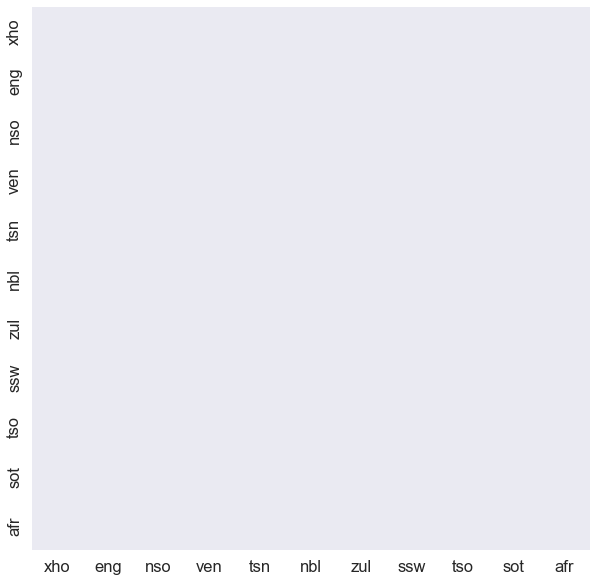

In [128]:
#Calculate number of shared trigrams
labels = ['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl','zul', 'ssw', 'tso', 'sot', 'afr']

mat = []
for i in labels:
    vec = []
    for j in labels:
        l1 = features[i]
        l2 = features[j]
        intersec = [l for l in l1 if l in l2] 
        vec.append(len(intersec))
    mat.append(vec)

#Plot heatmap
lang_id = ['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl','zul', 'ssw', 'tso', 'sot', 'afr']
conf_matrix_df = pd.DataFrame(mat,columns=lang_id,index=lang_id)
mask = [[False,False,False,False,False, False, False, False, False, False,False],
        [True, False,False,False,False, False, False, False, False, False,False],
        [True, True, False,False,False, False, False, False, False, False,False],
        [True, True, True, False,False, False, False, False, False, False,False],
        [True, True, True, True, False, False, False, False, False, False,False],
        [True, True, True, True, True,  False, False, False, False, False,False],
        [True, True, True, True, True,  True,  False, False, False, False,False],
        [True, True, True, True, True,  True,  True,  False, False, False,False],
        [True, True, True, True, True,  True,  True,  True,  False, False,False],
        [True, True, True, True, True,  True,  True,  True,  True,  False,False],
        [True, True, True, True, True,  True,  True,  True,  True,  True, True]]


plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix_df,cmap='coolwarm',annot=True,fmt='.5g',cbar=False,mask=mask)

#plt.savefig('../figures/feat_explore.png',format='png',dpi=150)

In [129]:
train_feat.to_csv('C:/Users/mayro/OneDrive/Desktop/Classification/Classification-Hackathon-Exam/Saved_csvs/train_feat.csv')
valid_feat.to_csv('C:/Users/mayro/OneDrive/Desktop/Classification/Classification-Hackathon-Exam/Saved_csvs/valid_feat.csv')
test_feat.to_csv('C:/Users/mayro/OneDrive/Desktop/Classification/Classification-Hackathon-Exam/Saved_csvs/test_feat.csv')
print(len(train_feat),len(valid_feat),len(test_feat))
train_feat.head()

15400 4400 2200


,dzw,gok,tu,eid,moh,tat,tjh,kub,ma,sa,...,ta,ge,ufu,dir,ka,t i,i t,o a,alo,lang_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,...,0.000000,0.125,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,afr
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.6,...,0.000000,0.000,0.000000,0.166667,0.181818,0.0,0.0,0.0,0.142857,tsn
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.8,...,0.000000,0.000,0.000000,0.000000,0.545455,0.0,0.0,0.0,0.000000,sot
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,...,0.142857,0.000,0.833333,0.000000,0.090909,0.0,0.2,0.0,0.000000,ssw
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000,0.000000,0.000000,0.090909,0.0,0.2,0.0,0.000000,tso


In [130]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

#Fit encoder
encoder = LabelEncoder()
encoder.fit(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl','zul', 'ssw', 'tso', 'sot', 'afr'])

def encode(y):
    """
    Returns a list of one hot encodings 
    
    Params
    ---------
        y: list of language labels
    """
    
    y_encoded = encoder.transform(y)
    y_dummy = np_utils.to_categorical(y_encoded)
    
    return y_dummy

In [131]:
from keras.models import Sequential
from keras.layers import Dense

x = train_feat.drop('lang_id',axis=1)
y = encode(train_feat['lang_id'])

x_val = valid_feat.drop('lang_id',axis=1)
y_val = encode(valid_feat['lang_id'])

In [132]:
def build_clf(unit):
# creating the layers of the NN
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=unit, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=unit, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return ann


In [133]:
from keras.wrappers.scikit_learn import KerasClassifier
model=KerasClassifier(build_fn=build_clf)


C:\Users\mayro\AppData\Local\Temp/ipykernel_60004/3790505690.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model=KerasClassifier(build_fn=build_clf)


In [134]:
def fit_model(nodes,epochs,batch_size):
    model = Sequential()
    model.add(Dense(nodes[0], input_dim=902, activation='relu'))
    model.add(Dense(nodes[1], activation='relu'))
    model.add(Dense(nodes[2], activation='relu'))
    model.add(Dense(11, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(x, y, epochs=epochs, batch_size=batch_size) #fit ANN
    
    train_acc = model.evaluate(x, y)
    val_acc = model.evaluate(x_val, y_val)
    
    return round(train_acc[1]*100,2),round(val_acc[1]*100,2)

In [135]:
nodes = [[100,100,50],[200,200,100],[300,200,100],[500,500,250]]
epochs = [1,2,3,4]
batch_size = [10,100,1000]

results = []
i = 0

for n in nodes:
    print("MODEL: ", i)
    for e in epochs:
        for b in batch_size:
            result = {}
            
            result['model'] = i
            result['nodes'] = n
            result['epochs'] = e
            result['batch_size'] = b
            result['train'], result['valid'] = fit_model(n,e,b)
            
            results.append(result)
            i+= 1

results_final = pd.DataFrame(results)

MODEL:  0
138/138 [==============================] - 0s 1ms/step - loss: 1.5543 - accuracy: 0.6434
Epoch 1/2
1540/1540 [==============================] - 2s 1ms/step - loss: 0.1504 - accuracy: 0.9529
Epoch 2/2
138/138 [==============================] - 0s 1ms/step - loss: 0.0301 - accuracy: 0.9900
Epoch 1/2
154/154 [==============================] - 0s 2ms/step - loss: 0.5141 - accuracy: 0.8621
Epoch 2/2
138/138 [==============================] - 0s 1ms/step - loss: 0.0318 - accuracy: 0.9900
Epoch 1/2
16/16 [==============================] - 0s 7ms/step - loss: 2.0866 - accuracy: 0.4128
Epoch 2/2
138/138 [==============================] - 0s 962us/step - loss: 0.4441 - accuracy: 0.9518
Epoch 1/3
1540/1540 [==============================] - 2s 1ms/step - loss: 0.1482 - accuracy: 0.9545
Epoch 2/3
1540/1540 [==============================] - 2s 1ms/step - loss: 0.0208 - accuracy: 0.9933
Epoch 3/3
138/138 [==============================] - 0s 997us/step - loss: 0.0325 - accuracy: 0.9900
Ep

Epoch 3/3
138/138 [==============================] - 0s 1ms/step - loss: 0.0620 - accuracy: 0.9820
Epoch 1/4
1540/1540 [==============================] - 2s 1ms/step - loss: 0.1240 - accuracy: 0.9613
Epoch 2/4
1540/1540 [==============================] - 2s 1ms/step - loss: 0.0217 - accuracy: 0.9922
Epoch 3/4
1540/1540 [==============================] - 2s 1ms/step - loss: 0.0128 - accuracy: 0.9962
Epoch 4/4
138/138 [==============================] - 0s 2ms/step - loss: 0.0402 - accuracy: 0.9891
Epoch 1/4
154/154 [==============================] - 1s 3ms/step - loss: 0.3432 - accuracy: 0.9091
Epoch 2/4
154/154 [==============================] - 0s 2ms/step - loss: 0.0225 - accuracy: 0.9926
Epoch 3/4
154/154 [==============================] - 0s 2ms/step - loss: 0.0102 - accuracy: 0.9971
Epoch 4/4
138/138 [==============================] - 0s 2ms/step - loss: 0.0324 - accuracy: 0.9889
Epoch 1/4
16/16 [==============================] - 0s 10ms/step - loss: 1.8327 - accuracy: 0.6905
Epoch

138/138 [==============================] - 0s 2ms/step - loss: 0.0313 - accuracy: 0.9905
Epoch 1/2
154/154 [==============================] - 1s 6ms/step - loss: 0.2141 - accuracy: 0.9461
Epoch 2/2
138/138 [==============================] - 0s 3ms/step - loss: 0.0565 - accuracy: 0.9811
Epoch 1/2
16/16 [==============================] - 1s 23ms/step - loss: 1.2237 - accuracy: 0.8184
Epoch 2/2
138/138 [==============================] - 0s 3ms/step - loss: 0.0667 - accuracy: 0.9770
Epoch 1/3
1540/1540 [==============================] - 5s 3ms/step - loss: 0.1097 - accuracy: 0.9638
Epoch 2/3
1540/1540 [==============================] - 5s 3ms/step - loss: 0.0264 - accuracy: 0.9912
Epoch 3/3
138/138 [==============================] - 0s 2ms/step - loss: 0.0338 - accuracy: 0.9900
Epoch 1/3
154/154 [==============================] - 1s 5ms/step - loss: 0.2204 - accuracy: 0.9403
Epoch 2/3
154/154 [==============================] - 1s 5ms/step - loss: 0.0187 - accuracy: 0.9936
Epoch 3/3
138/138

In [137]:
results_final[results_final.valid == results_final.valid.max()]

,model,nodes,epochs,batch_size,train,valid
45,45,"[500, 500, 250]",4,10,99.8,99.2


In [138]:
results_final[results_final.valid>98.3]

,model,nodes,epochs,batch_size,train,valid
0,0,"[100, 100, 50]",1,10,99.36,98.86
3,3,"[100, 100, 50]",2,10,99.71,99.00
4,4,"[100, 100, 50]",2,100,99.71,99.00
6,6,"[100, 100, 50]",3,10,99.82,99.00
7,7,"[100, 100, 50]",3,100,99.50,98.82
9,9,"[100, 100, 50]",4,10,99.55,98.64
10,10,"[100, 100, 50]",4,100,99.94,99.18
12,12,"[200, 200, 100]",1,10,99.62,98.75
13,13,"[200, 200, 100]",1,100,99.35,98.57
15,15,"[200, 200, 100]",2,10,99.63,98.82


In [139]:
from keras.models import Sequential
from keras.layers import Dense

#Get training data
x = train_feat.drop('lang_id',axis=1)
y = encode(train_feat['lang_id'])

#Define model
model = Sequential()
model.add(Dense(500, input_dim=902, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(250, activation='relu'))
model.add(Dense(11, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train model
model.fit(x, y, epochs=2, batch_size=100)

Epoch 1/2
154/154 [==============================] - 1s 6ms/step - loss: 0.2306 - accuracy: 0.9356
Epoch 2/2
154/154 [==============================] - 1s 6ms/step - loss: 0.0191 - accuracy: 0.9941


0.9872727272727273


Text(61.5, 0.5, 'Actual')

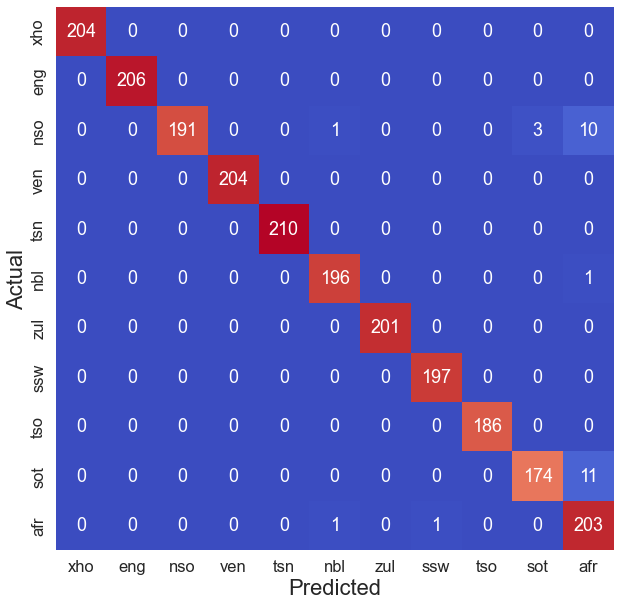

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix

x_test = test_feat.drop('lang_id',axis=1)
y_test = test_feat['lang_id']

#labels = model.predict_classes(x_test)
predict_x=model.predict(x_test)
classes_x=np.argmax(predict_x,axis=1)
predictions = encoder.inverse_transform(classes_x)

#Accuracy on test set
accuracy = accuracy_score(y_test,predictions)
print(accuracy)

#Create confusion matrix
lang_id = ['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl','zul', 'ssw', 'tso', 'sot', 'afr']
conf_matrix = confusion_matrix(y_test,predictions)
conf_matrix_df = pd.DataFrame(conf_matrix,columns=lang,index=lang)

#Plot confusion matrix heatmap
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix_df,cmap='coolwarm',annot=True,fmt='.5g',cbar=False)
plt.xlabel('Predicted',fontsize=22)
plt.ylabel('Actual',fontsize=22)

#plt.savefig('../figures/model_eval.png',format='png',dpi=150)

In [146]:
X_test.shape

(5682, 902)

In [147]:
text_pred= model.predict(X_test)

In [148]:
#The following codes are used to save the expected predictions for kaggle submission
kaggle_bnb = test_df[['index']]


In [149]:
kaggle_bnb['lang_id']= text_pred

ValueError: Expected a 1D array, got an array with shape (5682, 11)